In [1]:
from modsim import *
from pandas import read_html

In [2]:
filename = 'World_population_estimates.html'
tables = read_html(filename, header=0, index_col=0, decimal='M')
table2 = tables[2]
table2.columns = ['census', 'prb', 'un', 'maddison','hyde', 'tanton', 'biraben', 'mj', 'thomlinson', 'durand', 'clark']

In [3]:
un = table2.un / 1e9
census = table2.census / 1e9
t_0 = census.index[0]
t_end = census.index[-1]
elapsed_time = t_end - t_0
p_0 = census[t_0]
p_end = census[t_end]
total_growth = p_end - p_0
annual_growth = total_growth / elapsed_time

In [4]:
def growth_func_quad(t, pop, system):
    return system.alpha * pop + system.beta * pop**2

In [6]:
def run_simulation(system, growth_func):
    results = TimeSeries()
    results[system.t_0] = system.p_0
    for t in range(system.t_0, system.t_end):
        growth = growth_func(t, results[t], system)
        results[t+1] = results[t] + growth
    return results 

In [5]:
system = System(t_0=t_0,
                p_0=p_0,
                alpha=25/1000,
                beta=-1.8/1000,
                t_end=2100)

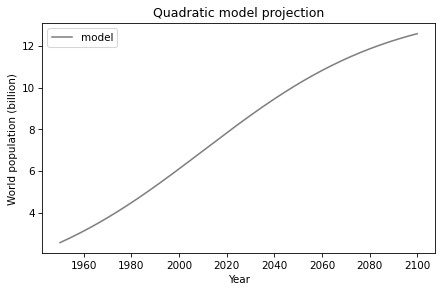

In [7]:
results=run_simulation(system, growth_func_quad)
results.plot(color='gray', label='model')
decorate(xlabel='Year', ylabel='World population (billion)',
         title='Quadratic model projection' )